In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as  plt

In [87]:
housing=pd.read_csv('Housing.csv')
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [88]:
housing.mainroad = housing.mainroad.map(dict(yes=1,no=0))
housing.guestroom = housing.guestroom.map(dict(yes=1,no=0))
housing.basement = housing.basement.map(dict(yes=1,no=0))
housing.hotwaterheating = housing.hotwaterheating.map(dict(yes=1,no=0))
housing.airconditioning = housing.airconditioning.map(dict(yes=1,no=0))
housing.prefarea = housing.prefarea.map(dict(yes=1,no=0))

housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [89]:
housing.shape

(545, 13)

In [90]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(housing, train_size=0.8, test_size=0.2)
df_train.shape

(436, 13)

In [91]:
df_test.shape

(109, 13)

In [92]:
num_vars=['area','bathrooms','bedrooms', 'stories','parking', 'price']
df_Newtrain=df_train[num_vars]
df_Newtest=df_test[num_vars]
df_Newtrain.head()

,area,bathrooms,bedrooms,stories,parking,price
542,3620,1,2,1,0,1750000
496,4000,1,2,1,0,2695000
484,3040,1,2,1,0,2870000
507,3600,1,2,1,0,2590000
252,9860,1,3,1,0,4515000


In [93]:
df_Newtrain.shape

(436, 6)

In [94]:
df_Newtest.shape

(109, 6)

In [95]:
dataset= df_Newtrain.values[:,:]
print('dataset=', dataset [:20,:])

dataset= [[   3620       1       2       1       0 1750000]
 [   4000       1       2       1       0 2695000]
 [   3040       1       2       1       0 2870000]
 [   3600       1       2       1       0 2590000]
 [   9860       1       3       1       0 4515000]
 [   3968       1       3       2       0 4410000]
 [   3840       1       3       2       1 4585000]
 [   9800       2       4       2       2 5250000]
 [   3640       1       2       1       0 3570000]
 [   3520       2       2       1       0 3640000]
 [  13200       1       3       2       2 9800000]
 [   2700       1       2       1       0 2940000]
 [   4300       2       6       2       0 6083000]
 [   4500       1       2       1       0 3255000]
 [   4995       2       4       1       0 4893000]
 [   3069       1       2       1       1 3150000]
 [   4352       1       4       2       1 2975000]
 [   8880       2       3       2       1 6930000]
 [  12944       1       3       1       0 3500000]
 [   7160       1     

In [96]:
x1= df_Newtrain.values [:,0]
x2= df_Newtrain.values [:,1]
x3= df_Newtrain.values [:,2]
x4= df_Newtrain.values [:,3]
x5= df_Newtrain.values [:,4]
y= df_Newtrain.values[:,5]
m= len(y)
y


array([ 1750000,  2695000,  2870000,  2590000,  4515000,  4410000,
        4585000,  5250000,  3570000,  3640000,  9800000,  2940000,
        6083000,  3255000,  4893000,  3150000,  2975000,  6930000,
        3500000,  5880000,  3500000,  4235000,  3710000,  4060000,
        2345000,  4550000, 10150000,  3640000,  2660000,  2233000,
        2135000,  4277000,  6230000,  6300000,  3920000,  7350000,
        8400000,  5215000,  7420000,  6230000,  4900000,  4550000,
        4060000,  3010000,  7343000,  5600000,  7140000, 10150000,
        9870000,  3780000,  2940000,  2653000,  3836000,  4760000,
        7962500,  3143000,  3500000,  4690000,  4340000,  4515000,
        1767150,  3080000,  5950000,  5530000,  3150000,  7210000,
        2800000,  3045000,  2835000,  1820000,  3465000,  4200000,
        5040000,  7350000,  5250000,  4690000,  4900000,  5495000,
        1750000,  8120000,  3675000,  8890000,  3920000,  4550000,
        2275000,  7350000,  6650000,  8463000,  5250000,  6405

In [97]:
x_1=x1.reshape(m,1)
print('x_1=', x_1[:5,:])

x_1= [[3620]
 [4000]
 [3040]
 [3600]
 [9860]]


In [98]:
x_2=x2.reshape(m,1)
x_3=x3.reshape(m,1)
x_4=x4.reshape(m,1)
x_5=x5.reshape(m,1)

In [99]:
x_0=np.ones((m,1))
x_0[:5], len(x_0)


(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [100]:
x=np.hstack((x_0, x_1, x_2, x_3, x_4, x_5))
x[:5]

array([[1.00e+00, 3.62e+03, 1.00e+00, 2.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 4.00e+03, 1.00e+00, 2.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.04e+03, 1.00e+00, 2.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.60e+03, 1.00e+00, 2.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 9.86e+03, 1.00e+00, 3.00e+00, 1.00e+00, 0.00e+00]])

In [101]:
dataset_test= df_Newtest.values[:,:]
print('dataset=', dataset_test[:20,:])

dataset= [[   4000       1       3       2       1 4585000]
 [   9620       1       3       1       2 6083000]
 [   3460       1       4       2       0 4007500]
 [  13200       1       2       1       1 6930000]
 [   3660       1       4       2       0 2940000]
 [   6350       2       3       3       0 6195000]
 [   3850       1       3       1       2 3535000]
 [   3480       1       3       2       1 2940000]
 [   3512       1       2       1       1 3500000]
 [   9000       2       4       4       2 7980000]
 [   6000       2       4       4       0 6755000]
 [   3960       1       3       2       0 3990000]
 [   3450       1       3       2       0 3150000]
 [   6060       1       3       1       0 3290000]
 [   5985       1       3       1       0 4130000]
 [   2430       1       3       1       0 2660000]
 [   4900       1       2       2       0 4410000]
 [   6020       1       3       1       0 3710000]
 [   3100       1       3       2       0 3360000]
 [   4500       1     

In [102]:
x1t= df_Newtest.values [:,0]
x2t= df_Newtest.values [:,1]
x3t= df_Newtest.values [:,2]
x4t= df_Newtest.values [:,3]
x5t= df_Newtest.values [:,4]
yt= df_Newtest.values[:,5]
n= len(yt)
x1t

array([ 4000,  9620,  3460, 13200,  3660,  6350,  3850,  3480,  3512,
        9000,  6000,  3960,  3450,  6060,  5985,  2430,  4900,  6020,
        3100,  4500,  8150,  6450,  5000,  1700,  6420,  3150,  7000,
        5680,  3300,  6420,  4400,  2275,  8400,  4040,  3120,  6440,
        6000,  3036,  3450,  2175,  8500,  5900,  5800,  5495,  3520,
        6000,  4160,  4040,  4046,  5700,  4840,  9667,  1650,  3850,
        5880,  5720,  8250,  4640,  3600,  7000, 12900,  6600,  2135,
        6000,  2640,  2817,  7155,  4410,  4500,  6300,  2145,  5500,
        3600,  4260,  3780,  2870,  3420,  8580,  2910,  4000,  2145,
        7686,  4510,  7152,  4600,  3240,  3420,  5800,  3150,  4075,
        7424,  9000,  3640,  3150,  2145,  8960,  2160,  6550,  7770,
        8400, 10500,  3480,  2787,  3000,  6420,  5200,  6060,  4500,
        6100], dtype=int64)

In [103]:
yt

array([ 4585000,  6083000,  4007500,  6930000,  2940000,  6195000,
        3535000,  2940000,  3500000,  7980000,  6755000,  3990000,
        3150000,  3290000,  4130000,  2660000,  4410000,  3710000,
        3360000,  4270000,  5005000,  5383000,  6440000,  1890000,
        6125000,  5460000,  5803000,  4620000,  5530000,  5950000,
        4305000,  3640000,  5250000,  3325000,  3703000,  4753000,
        9100000,  3500000,  3150000,  4270000,  8960000,  4060000,
        5740000,  3129000,  3633000,  7560000,  4620000,  3290000,
        4165000,  6650000,  4165000,  4690000,  3150000,  3850000,
        3290000,  5075000,  6510000,  5740000,  3780000,  4795000,
        4900000,  5460000,  3500000,  7525000,  2835000,  5495000,
        8680000,  4200000,  4200000,  4900000,  3332000,  6195000,
        4098500,  6650000,  3885000,  4620000,  1960000,  6440000,
        1750000,  3605000,  3290000,  4970000,  4613000,  3850000,
        3500000,  6107500,  3780000,  4900000,  3570000,  4340

In [104]:
x_1t=x1t.reshape(n,1)
x_2t=x2t.reshape(n,1)
x_3t=x3t.reshape(n,1)
x_4t=x4t.reshape(n,1)
x_5t=x5t.reshape(n,1)
x_0t=np.ones((n,1))
x_0t[:5], len(x_0)


(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [105]:
xt=np.hstack((x_0t, x_1t, x_2t, x_3t, x_4t, x_5t))
xt[:5]

array([[1.00e+00, 4.00e+03, 1.00e+00, 3.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 9.62e+03, 1.00e+00, 3.00e+00, 1.00e+00, 2.00e+00],
       [1.00e+00, 3.46e+03, 1.00e+00, 4.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 1.32e+04, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 3.66e+03, 1.00e+00, 4.00e+00, 2.00e+00, 0.00e+00]])

In [106]:
theta=np.zeros((6,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [107]:
def compute_loss(x,y, theta):
    
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J= 1 / (2 * m) * np.sum(sqrErrors) 
    
    return J

In [108]:
cost = compute_loss(x, y, theta)
print('The cost for given values of theta_0,_1,_2,_3, ..., -6 is:', cost)

The cost for given values of theta_0,_1,_2,_3, ..., -6 is: 5770455632864301.0


In [109]:
def gradient_descent(x, y, theta, alpha, iterations,xt,yt):
    
    loss_history= np.zeros(iterations)
    v_loss_history= np.zeros(iterations)  
    
    for i in range(iterations):
        predictions= x.dot(theta)
        errors=np.subtract(predictions, y)
        sum_delta=(alpha/ m)* x.transpose().dot(errors)
        theta= theta - sum_delta
        loss_history[i]= compute_loss(x,y,theta)
        v_loss_history[i]=compute_loss(xt,yt,theta)
        
        
    return theta, loss_history,v_loss_history

In [121]:
theta=[0,0,0,0,0,0]
iterations=5000;
alpha=0.01;

In [122]:
theta, loss_history,v_loss_history = gradient_descent(x,y, theta, alpha, iterations,xt,yt)
print('Final value of theta=', theta)
print('loss_history=', loss_history)
print('validation_loss_history=', v_loss_history)

<ipython-input-107-4c2d1e5d490b>:5: RuntimeWarning: overflow encountered in square
  sqrErrors = np.square(errors)
<ipython-input-109-869795a35c0b>:10: RuntimeWarning: invalid value encountered in subtract
  theta= theta - sum_delta


Final value of theta= [nan nan nan nan nan nan]
loss_history= [1.11557621e+24 1.07933193e+35 1.04426520e+46 ...            nan
            nan            nan]
validation_loss_history= [2.84454317e+23 2.75212546e+34 2.66271085e+45 ...            nan
            nan            nan]


Text(0.5, 1.0, 'Convergence of gradient descent')

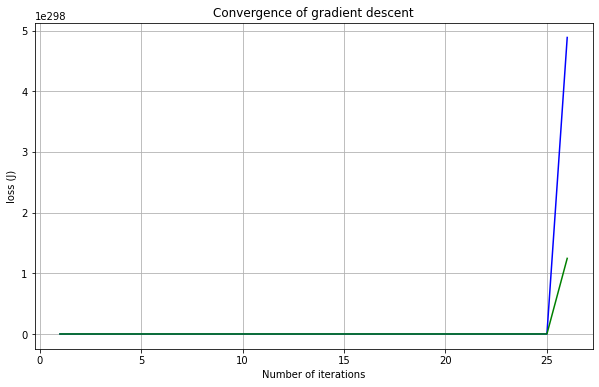

In [123]:
plt.plot(range(1, iterations +1), loss_history, color='blue')
plt.plot(range(1, iterations +1), v_loss_history, color='green')
plt.rcParams["figure.figsize"]= (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')